# Analyze solution
This notebooks provides scripts to analyze specific solution.

## Test data
Change path to a relevant solution

In [1]:
import pandas as pd
import json
import geopandas as gpd

solution_dir = "../experiments/demo/out/base_balance.delivery.100"

solution_geo = gpd.read_file('{}/solution_0.geojson'.format(solution_dir))
with open('{}/solution_0.json'.format(solution_dir)) as json_file:
    solution = json.load(json_file)

#df = pd.json_normalize(solution["tours"], record_path=['stops'], meta = ['vehicleId', 'shiftIndex'], sep="_")

# Visualization

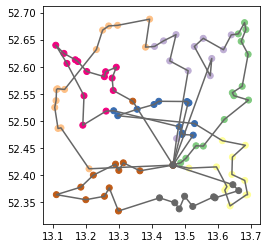

In [2]:
#import geojsonio
#geojsonio.embed(solution_geo.to_json())
# TODO use `ipyleaflet`

plot = solution_geo.plot(cmap='Accent')

# Tour data

In [3]:
pd.json_normalize(solution['tours']).drop('stops', axis=1)  

,vehicleId,typeId,shiftIndex,statistic.cost,statistic.distance,statistic.duration,statistic.times.driving,statistic.times.serving,statistic.times.waiting,statistic.times.break
0,vehicle_5,vehicle,0,135.8664,89807,18581,8981,6000,0,3600
1,vehicle_3,vehicle,0,146.4296,104898,20090,10490,6000,0,3600
2,vehicle_2,vehicle,0,136.9258,91329,18732,9132,6000,0,3600
3,vehicle_1,vehicle,0,136.8222,91186,18717,9117,6000,0,3600
4,vehicle_4,vehicle,0,135.5358,89354,18533,8933,6000,0,3600


## Tour statistics

In [4]:
pd.json_normalize(solution['tours']).drop('stops', axis=1).describe()

,shiftIndex,statistic.cost,statistic.distance,statistic.duration,statistic.times.driving,statistic.times.serving,statistic.times.waiting,statistic.times.break
count,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0
mean,0.0,138.315960,93314.800000,18930.600000,9330.600000,6000.0,0.0,3600.0
std,0.0,4.575059,6531.429989,653.754771,653.754771,0.0,0.0,0.0
min,0.0,135.535800,89354.000000,18533.000000,8933.000000,6000.0,0.0,3600.0
25%,0.0,135.866400,89807.000000,18581.000000,8981.000000,6000.0,0.0,3600.0
50%,0.0,136.822200,91186.000000,18717.000000,9117.000000,6000.0,0.0,3600.0
75%,0.0,136.925800,91329.000000,18732.000000,9132.000000,6000.0,0.0,3600.0
max,0.0,146.429600,104898.000000,20090.000000,10490.000000,6000.0,0.0,3600.0
